# Data Science Masters :Assignment 27


# Problem:
To use the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.

# Solution: 

Importing Libraries...

In [1]:
# Mathematical computation
import numpy as np

# DateFrame setup
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Machine learning pkgs
from sklearn.metrics import mean_absolute_error , mean_squared_error 
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.neighbors import KNeighborsRegressor , kneighbors_graph

# Data Pre-processing Steps

In [2]:
# loading Dataset
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

In [3]:
# Sample data
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
# Column names...
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

# Exploring Data - Analysis

In [5]:
# information on dataset
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [6]:
# checking for duplicates and dropping the same...
if(nba.duplicated().any()):
    nba=df_AdultData_trainSet.drop_duplicates(keep='first')

In [7]:
# Printing unique values in each column in training set
for col in nba.select_dtypes(include=[np.object]).columns:
        print(col , " :" , nba[col].unique(),"\n")

player  : ['Quincy Acy' 'Steven Adams' 'Jeff Adrien' 'Arron Afflalo' 'Alexis Ajinca'
 'Cole Aldrich' 'LaMarcus Aldridge' 'Lavoy Allen' 'Ray Allen' 'Tony Allen'
 'Al-Farouq Aminu' 'Louis Amundson' 'Chris Andersen' 'Alan Anderson'
 'James Anderson' 'Ryan Anderson' 'Giannis Antetokounmpo'
 'Carmelo Anthony' 'Joel Anthony' 'Pero Antic' 'Trevor Ariza'
 'Hilton Armstrong' 'Darrell Arthur' 'Omer Asik' 'D.J. Augustin'
 'Gustavo Ayon' 'Jeff Ayres' 'Chris Babb' 'Luke Babbitt' 'Leandro Barbosa'
 'Jose Barea' 'Andrea Bargnani' 'Harrison Barnes' 'Matt Barnes'
 'Will Barton' 'Brandon Bass' 'Shane Battier' 'Nicolas Batum'
 'Jerryd Bayless' 'Aron Baynes' 'Kent Bazemore' 'Bradley Beal'
 'Michael Beasley' 'Marco Belinelli' 'Anthony Bennett' 'Patrick Beverley'
 'Andris Biedrins' 'Chauncey Billups' 'Bismack Biyombo' 'DeJuan Blair'
 'Steve Blake' 'Andray Blatche' 'Eric Bledsoe' 'Vander Blue'
 'Keith Bogans' 'Andrew Bogut' 'Matt Bonner' 'Trevor Booker'
 'Carlos Boozer' 'Chris Bosh' 'Avery Bradley' 'Elton Br

As we can observe the columns player , bref_team_id , season & season_end are irrelevant when classification done with K-nearest neighbors algorithm. Hence, we need to drop from the given dataset.

In [8]:
# Drop columns which are not in need 
columns_to_del = ['player','bref_team_id','season','season_end']
nba = nba.drop(columns=columns_to_del , axis= 1 )
# Sample rows after removing columns..
nba.head()

,pos,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,SF,23,63,0,847,66,141,0.468,4,15,...,0.660,72,144,216,28,23,26,30,122,171
1,C,20,81,20,1197,93,185,0.503,0,0,...,0.581,142,190,332,43,40,57,71,203,265
2,PF,27,53,12,961,143,275,0.520,0,0,...,0.639,102,204,306,38,24,36,39,108,362
3,SG,28,73,73,2552,464,1011,0.459,128,300,...,0.815,32,230,262,248,35,3,146,136,1330
4,C,25,56,30,951,136,249,0.546,0,1,...,0.836,94,183,277,40,23,46,63,187,328


In [9]:
# trimming white space in the dataset
nba=nba.apply(lambda x: x.str.strip() if x.dtype == "object" else x) 

In [10]:
# check null/na present in the dataset or not
nba.isnull().sum()

pos      0
age      0
g        0
gs       0
mp       0
fg       0
fga      0
fg.      2
x3p      0
x3pa     0
x3p.    67
x2p      0
x2pa     0
x2p.     3
efg.     2
ft       0
fta      0
ft.     20
orb      0
drb      0
trb      0
ast      0
stl      0
blk      0
tov      0
pf       0
pts      0
dtype: int64

Looks like, columns x3p., x2p., ft., efg. and fg. contains null values. we would be replace them with their column's median value.

In [11]:
# replacing null with median value...
cols = ['x3p.' , 'ft.' , 'x2p.' , 'fg.' , 'efg.']
for col in cols:
        nba[col].fillna(nba[col].median(),inplace=True)

In [12]:
nba.isnull().values.any()

False

In [13]:
# Statistical observation on numeric columns
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436443,39.613306,110.130977,0.291500,...,0.723607,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098467,50.855639,132.751732,0.147080,...,0.156898,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.401000,0.000000,3.000000,0.262626,...,0.657000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,0.751000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479000,68.000000,193.000000,0.366460,...,0.816000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000


In [14]:
nba.describe(include=[np.object]) # np.object for object type data

,pos
count,481
unique,7
top,SG
freq,109


# Data Visualisation

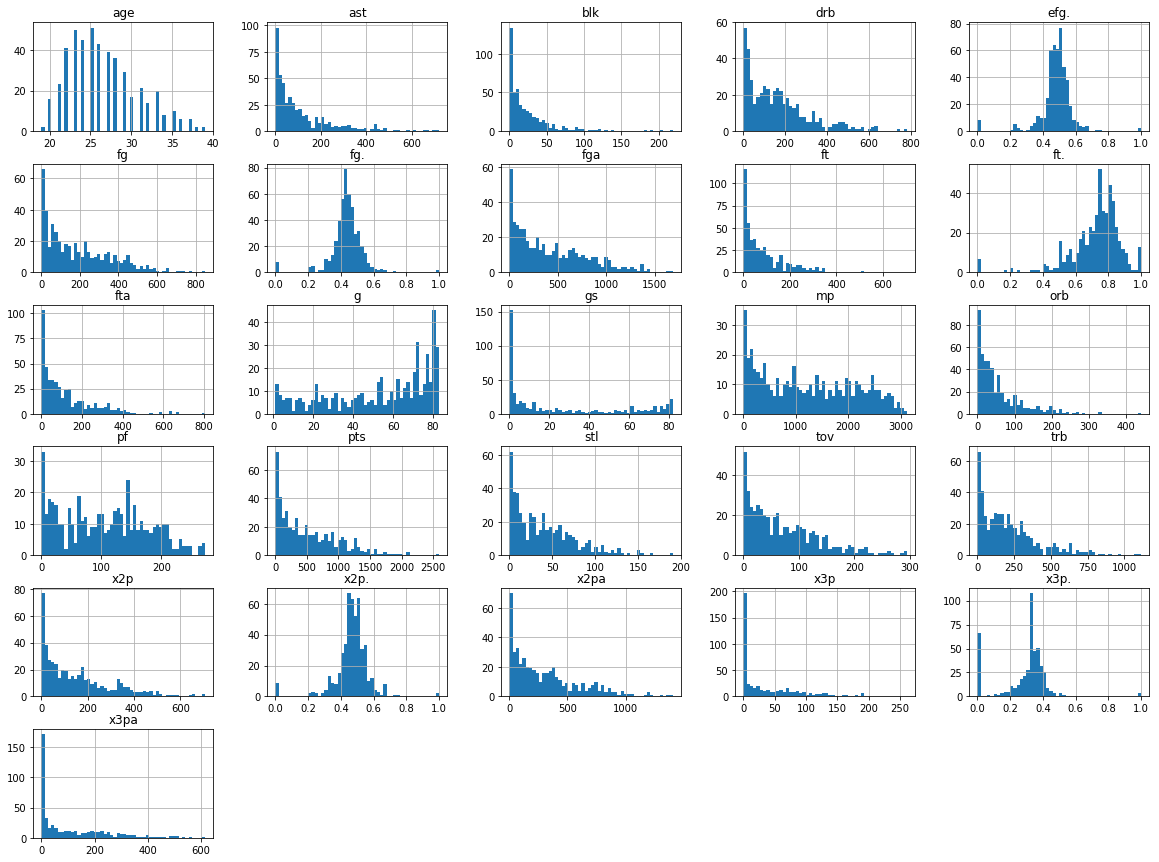

In [15]:
# Training Set
nba.hist(bins=50, figsize=(20,15))
plt.show()

### Label - OneHotEncoding

In [16]:
# Replacing catgeories as numberic object before passing to machine learning model
nba = nba.join(pd.get_dummies(nba['pos'], prefix='pos').iloc[:,:-1])
nba = nba.drop('pos', axis=1)

In [17]:
nba.head(2)

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,blk,tov,pf,pts,pos_C,pos_F,pos_G,pos_PF,pos_PG,pos_SF
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,26,30,122,171,0,0,0,0,0,1
1,20,81,20,1197,93,185,0.503,0,0,0.330976,...,57,71,203,265,1,0,0,0,0,0


### Feature and Target variables 

In [18]:
df_target = nba['pts'] #Selection of points (pts) variable
df_feature = nba.drop('pts',axis = 1)

In [19]:
# Sample rows
df_target.head(2), df_feature.head(2)

(0    171
 1    265
 Name: pts, dtype: int64,
    age   g  gs    mp  fg  fga    fg.  x3p  x3pa      x3p.   ...    stl  blk  \
 0   23  63   0   847  66  141  0.468    4    15  0.266667   ...     23   26   
 1   20  81  20  1197  93  185  0.503    0     0  0.330976   ...     40   57   
 
    tov   pf  pos_C  pos_F  pos_G  pos_PF  pos_PG  pos_SF  
 0   30  122      0      0      0       0       0       1  
 1   71  203      1      0      0       0       0       0  
 
 [2 rows x 31 columns])

# Train & Test sets

In [20]:
# Spliting Data to Train and test
X_train , X_test , y_train , y_test= train_test_split(df_feature , df_target , random_state=25,test_size=0.3 , shuffle=True)
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((336, 31), (145, 31), (336,), (145,))

## Modeling - K-nearest neighbors

In [21]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,10)
train_accuracy =  {} # dictionary to hold score
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsRegressor(n_neighbors=k)
    #Fit the model using train data
    knn.fit(X_train, y_train)
    #Getting accuracy score for different K-value on Training set
    train_accuracy[k]=knn.score(X_train, y_train)

In [22]:
# Model accuracy with k value:
train_accuracy

{1: 1.0,
 2: 0.9891586266446848,
 3: 0.9853589126395186,
 4: 0.9828843596374411,
 5: 0.9822746390470796,
 6: 0.9792089164860184,
 7: 0.9765308507675173,
 8: 0.9737272634312061,
 9: 0.9725098421782812}

In [23]:
#Converting train_accuracy into dataframe 
df_Train_accuracy_Score = pd.DataFrame( list(zip(train_accuracy.keys() , train_accuracy.values())) , columns=['K-Value', 'Accuracy_Score']  )
df_Train_accuracy_Score

,K-Value,Accuracy_Score
0,1,1.000000
1,2,0.989159
2,3,0.985359
3,4,0.982884
4,5,0.982275
5,6,0.979209
6,7,0.976531
7,8,0.973727
8,9,0.972510


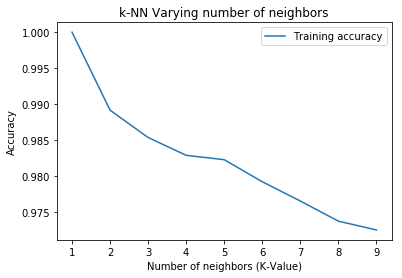

In [24]:
# Plot Between K-Value and Model Accuracy Score
plt.title('k-NN Varying number of neighbors')
plt.plot(df_Train_accuracy_Score['K-Value'], df_Train_accuracy_Score['Accuracy_Score'], label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors (K-Value)')
plt.ylabel('Accuracy')
plt.show()

Looks like, k = 4 would be optimal for this case.

In [25]:
# re-fitting model with k value as 4
knn_reg = KNeighborsRegressor(n_neighbors=4 , algorithm='auto', weights='uniform')
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=4, p=2,
          weights='uniform')

In [26]:
# Model Accuarcy Score on test set
accuracy_Score_test = knn_reg.score(X=X_test, y=y_test)
print("Model (Test Set) : ",accuracy_Score_test)

Model (Test Set) :  0.9752721285759218


In [27]:
# Predicting the points using the model
y_test_pred = knn_reg.predict(X_test)

In [28]:
# printing first 5 values
y_test_pred[:5]

array([1151.25,  709.25,  579.75, 1033.5 ,  283.  ])

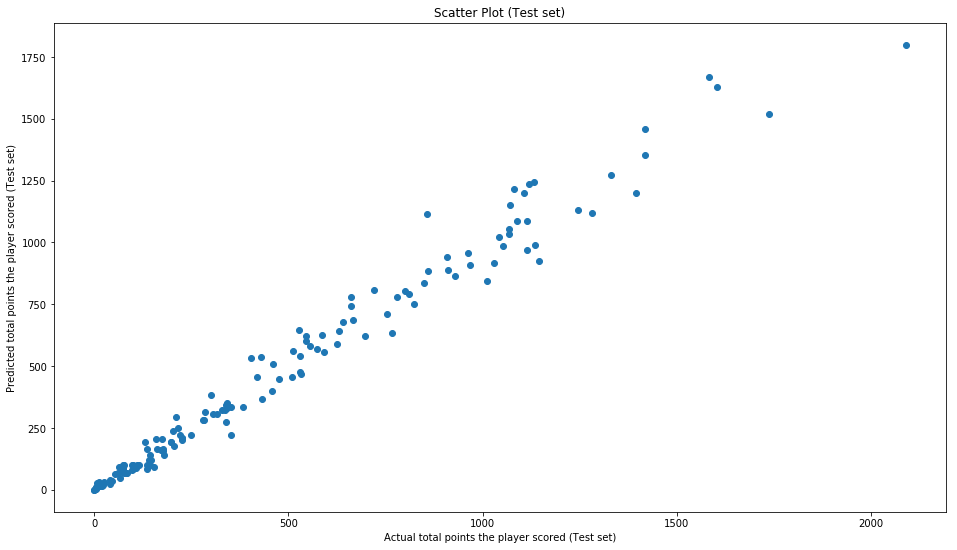

In [29]:
#Scatter Plot of "Actual vs predicted values"
plt.figure(figsize=(16,9))
plt.title("Scatter Plot (Test set)")
plt.xlabel("Actual total points the player scored (Test set)")
plt.ylabel("Predicted total points the player scored (Test set)")
plt.scatter(y_test,y_test_pred)
plt.show()

#### Model Evalution

In [30]:
from math import sqrt
mean_absolute_error_test = mean_absolute_error(y_test,y_test_pred)
mean_sqaured_error_test = mean_squared_error(y_test,y_test_pred)
root_mean_sqaured_error_test = sqrt(mean_sqaured_error_test)
print('Mean Absolute Error on Test dataset:', mean_absolute_error_test)  
print('Mean Squared Error on Test dataset:', mean_sqaured_error_test)  
print('Root Mean Squared Error on Test dataset:', root_mean_sqaured_error_test)

Mean Absolute Error on Test dataset: 45.543103448275865
Mean Squared Error on Test dataset: 4934.975431034482
Root Mean Squared Error on Test dataset: 70.24938028932698


#### Model Tuning using Gridsearch CV

In [31]:
neighbor_params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = KNeighborsRegressor()
# Selecting GridSearchCV with KNN model
modelSearch_GrdCV = GridSearchCV(knn, neighbor_params, cv=10)
modelSearch_GrdCV.fit(X_train,y_train)
modelSearch_GrdCV.best_params_

{'n_neighbors': 4}

In [32]:
# Model accuracy score
modelSearch_GrdCV.score(X_test, y_test)

0.9752721285759218

Hence, KNN regressor with 4 negibour achieves the best accuracy (0.9752 i.e about 97.52%) for the given dataset. 